In [72]:
import numpy as np              #for numerics
import pandas as pd             #for data manipulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns           #for data visualization
from sklearn.model_selection import train_test_split   #sklearn for machine learning concept implementation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [73]:
pwd   #to find the path of the current working directory

'C:\\Users\\lenovo\\First Project on Logistic Regression'

In [74]:
titanic=pd.read_csv("full.csv")

In [75]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [76]:
#replacing Sex column and Embarked column values with numeric values
titanic.Sex=titanic.Sex.replace('male',1).replace('female',0)
titanic.Embarked=titanic.Embarked.replace('S',1).replace('C',0).replace('Q',2)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1.0,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1.0,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1.0,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [77]:
#replacing Cabin column values with numeric data,i.e. their counts
titanic['Cabin']=titanic['Cabin'].fillna(0)
count=titanic['Cabin'].value_counts().to_dict()
titanic=titanic.replace({"Cabin":count})


In [78]:
titanic['Body'].isnull().mean()*100

90.06875477463713

In [79]:
titanic['Lifeboat'].isnull().mean()*100

61.65011459129106

In [80]:
len(titanic['Body'])

1309

In [81]:
#removing all rows with null values (NaN) in the survived column
titanic=titanic[titanic['Survived'].notna()]
len(titanic)

891

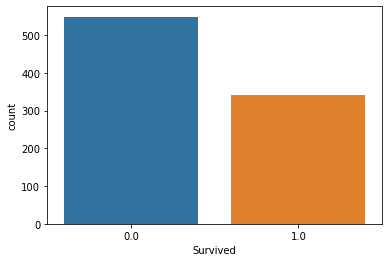

In [82]:
sns.countplot(x='Survived', data=titanic)

In [136]:
#creating Y and X datasets by dropping irrelevant columns
Y=titanic['Survived']
X=titanic.drop(['PassengerId','Survived','Name','Ticket','Fare','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination'],axis=1)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Lifeboat,Body,Class
0,3,1,22.0,1,0,1014,1.0,NaN,NaN,3.0
1,1,0,38.0,1,0,2,0.0,4,NaN,1.0
2,3,0,26.0,0,0,1014,1.0,14?,NaN,3.0
3,1,0,35.0,1,0,2,1.0,D,NaN,1.0
4,3,1,35.0,0,0,1014,1.0,NaN,NaN,3.0


In [137]:
#dropping the columns with more than 60% NaN
X=X.loc[:,X.isnull().mean()<=.6]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Class
0,3,1,22.0,1,0,1014,1.0,3.0
1,1,0,38.0,1,0,2,0.0,1.0
2,3,0,26.0,0,0,1014,1.0,3.0
3,1,0,35.0,1,0,2,1.0,1.0
4,3,1,35.0,0,0,1014,1.0,3.0


In [138]:
#Filling in the NaN values with the mean values of the respective columns
X=X.fillna(X.mean())

In [139]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

 # Logistic Regression on Titanic Extended Dataset(Kaggle+Wikipedia)

In [140]:
#splitting the titanic dataset into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
y_train

35     0.0
46     0.0
453    1.0
291    1.0
748    0.0
      ... 
715    0.0
767    0.0
72     0.0
235    0.0
37     0.0
Name: Survived, Length: 668, dtype: float64

In [141]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [142]:
#creating an instance of Logistic regression model and then training it with fit method on the training datasets
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [143]:
#predicting the output dependent variable
y_pred=logreg.predict(x_test)
print("Survival Prediction :" ,y_pred)

Survival Prediction : [1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0.]


In [144]:
#calculating the accuracy score and precision score of the model
score=logreg.score(x_test,y_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print("score is: ",score)
print("Accuracy score is: ",acc)
print("Precision score is: ",ps)
print("R Squared score is: ",r2)

score is:  0.820627802690583
Accuracy score is:  0.820627802690583
Precision score is:  0.8160919540229885
R Squared score is:  0.26644736842105254


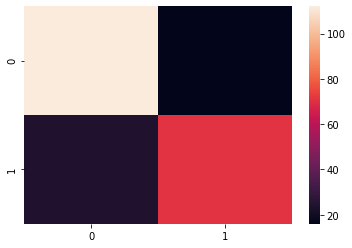

In [115]:
#finding the confusion matrix of the model and plotting its heatmap
cm=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm)